In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_line(l, lim = 10,color = 'tab:blue'):
    a,b,c = l
    if b != 0:
        X = np.linspace(-lim,lim)
        Y = -(c + a*X)/b
        plt.plot(X,Y, c = color,linewidth = 2)
    else:
        Y = np.linspace(-lim,lim)
        X = -(c + b*Y)/a
        plt.plot(X,Y,c = color)

In [3]:
def rotate_line(pp,th):
    a,b,c = pp
    cos = np.cos(th)
    sin = np.sin(th)
    return np.round(cos*a - sin*b, 9), np.round(sin*a + cos*b, 9), c

In [4]:
np.sin(np.pi/8)

0.3826834323650898

In [5]:
cols = ["x","y"]

fnam = "gen_6/G_min_points_lattices/G_d_35_n_8_Fdamp_full.csv"
fnam = "gen_6/G_min_points_lattices/G_d_35_n_8_FAdamp_no_pairs_v2.csv"
fnam = "gen_6/q4/B_points_lattices/B_d_35_n_8_40kremoved.csv"
fnam = "gen_7/q5/B_min_points_lattices/B_d_75_n_20_no_pairs_full.csv"
#fnam = "gen_7/q3/B_points_lattices/B_d_70_n_12_no_pairs_full.csv"
#fnam = "gen_7/q3/B_points_lattices/B_d_70_n_12_no_pairs_full.csv"
p = 580e-9
#p = 1

symm = 12

f = open(fnam,"r")
lines = f.readlines()
ii = 0
for l in lines:
    ii += 1
    if "PARTICLE" in l:
        break


df = pd.read_csv(fnam, names = cols, skiprows = ii)
print(len(df.x))

116652


In [6]:
df.head()

,x,y
0,1.264069e-06,2.786603e-07
1,1.264069e-06,-2.786603e-07
2,1.234046e-06,-3.907078e-07
3,9.553861e-07,-8.733616e-07
4,8.733616e-07,-9.553861e-07


In [7]:
th = 2*np.pi/symm
r_matr = np.array([[np.cos(th),np.sin(th)],[-np.sin(th),np.cos(th)]])

In [8]:
PP0 = np.zeros((len(df.x),2))
PP0[:,0] = df.x/580e-9
PP0[:,1] = df.y/580e-9

PPr = np.dot(PP0,r_matr)

(-10.0, 10.0)

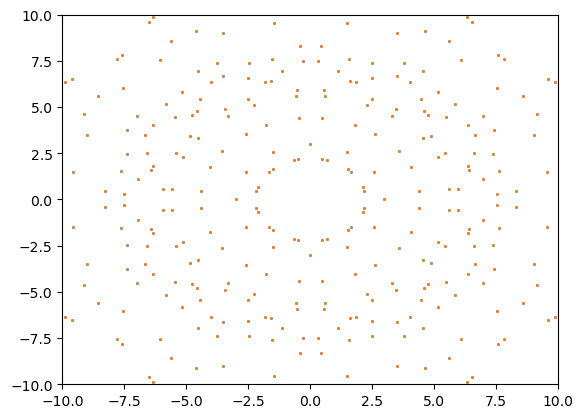

In [9]:
lim = 10
plt.scatter(PP0[:,0],PP0[:,1], s = 1)
plt.scatter(PPr[:,0],PPr[:,1], s = 1)
plt.xlim([-lim,lim])
plt.ylim([-lim,lim])

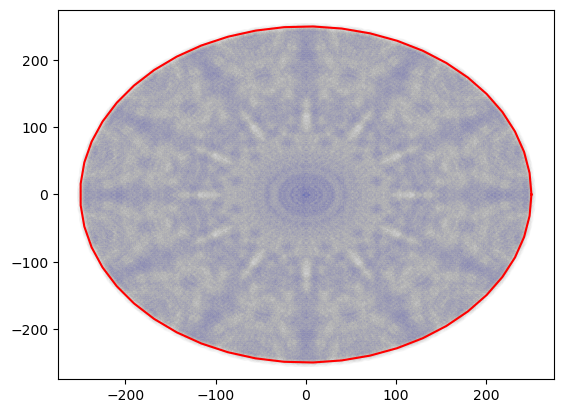

In [10]:
lim = 1e-5
plt.scatter(PP0[:,0],PP0[:,1], alpha = 0.002)

T = np.linspace(0,2*np.pi)
rr = 250
X = np.cos(T)*rr
Y = np.sin(T)*rr

plt.plot(X,Y,'r')

#plt.xlim([-lim,lim])
#plt.ylim([-lim,lim])

In [11]:
N_points = len(df.x)
PP = np.zeros((N_points,3))

PP[:,0] = df.x
PP[:,1] = df.y
PP[:,2] = np.ones(N_points)

In [12]:
l0 = np.array([0,1,0])
l1 = rotate_line(l0, np.pi/symm + np.pi)
l2 = rotate_line(l0, 0)
Lines = np.array([l1,l2])
LA = np.dot(Lines,PP.T)
sLA = np.sign(LA)
sLA[sLA == 0] = 1

In [13]:
s = np.sum(sLA, axis = 0)
unique, counts = np.unique(s, return_counts=True)

dict(zip(unique, counts))

{-2.0: 4861, 0.0: 106930, 2.0: 4861}

In [14]:
n_in = 2
dft = df[s >= n_in]

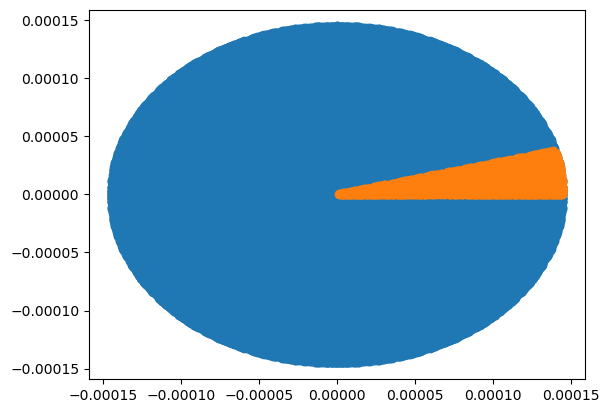

In [15]:
plt.scatter(df.x, df.y)
plt.scatter(dft.x, dft.y)

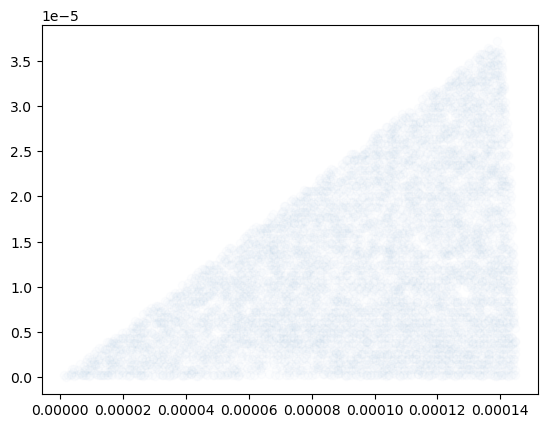

In [16]:
plt.scatter(dft.x, dft.y, alpha = 0.01)

In [17]:
N_slice = len(dft.x)


In [18]:
dft['r'] = np.sqrt(dft.x**2 + dft.y**2)
dft = dft.sort_values(['r'])

/tmp/ipykernel_246509/4059934717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['r'] = np.sqrt(dft.x**2 + dft.y**2)


In [19]:
df_small = dft[dft.r < rr]
df_small.reset_index(drop = True,inplace = True)
PP1 = np.zeros((len(df_small.x),2))
PP1[:,0] = df_small.x
PP1[:,1] = df_small.y
N_small = len(df_small.x)
N_small

4861

In [20]:
r_inv = np.linalg.inv(r_matr)
PP_ = np.copy(PP1)

In [21]:
def refl(p, th_ax):
    th = np.arctan2(p[1],p[0])
    r = np.linalg.norm(p)
    
    x = r*np.cos(2*th_ax - th)
    y = r*np.sin(2*th_ax - th)
    return np.array([x,y])

In [22]:
p0 = np.array([1,0])
refl(p0, np.pi/4)

array([6.123234e-17, 1.000000e+00])

In [23]:
rad = 4*p

df['r'] = np.sqrt(df.x**2 + df.y**2)

df_center = df[df['r'] < 2*rad/(np.sin(np.pi/symm))]
PP_cent = np.zeros((df_center.shape[0],2))
PP_cent[:,0] = df_center.x
PP_cent[:,1] = df_center.y

In [24]:
df_cent_small = df_small[df_small.r < 2*rad/(np.sin(np.pi/symm))]

Nc = df_cent_small.shape[0]

NJ = df_center.shape[0]
JJ = np.ones(df_center.shape[0])*-1
for k in range(Nc):
    print(k)
    p0 = np.array([df_cent_small.x[k],df_cent_small.y[k]])
    p0_ = np.copy(p0)
    p0_[1] *= -1
    for i in range(symm):
        
        for j in range(NJ):
            p2 = np.array([df_center.x[j],df_center.y[j]])
            if np.linalg.norm(p2 - p0) < 1e-10:
                JJ[j] = k
            if np.linalg.norm(p2 - p0_) < 1e-10:
                JJ[j] = k
        
        p0 = np.dot(r_matr,p0)
        p0_= np.dot(r_matr,p0_)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93


In [25]:
uniq, count = np.unique(JJ, return_counts=True)
count

array([24, 12, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24])

In [26]:
N_small

4861

In [27]:
AA = np.zeros((N_small,N_small))


#istart = len(df_small[df_small['r'] < rad*1.1])

for i in range(N_small):
    p1 = PP_[i]
    r1 = np.linalg.norm(p1)
    AA[i,i] = 1
    
    if r1 < rad/(np.sin(np.pi/symm)):
        for j in range(PP_cent.shape[0]): # Bug in the definition of j
            p2 = PP_cent[j]
            
            if np.linalg.norm(p1 - p2) == 0:
                continue
            
            if np.linalg.norm(p1 - p2) < rad:
                jj = int(JJ[j])
                AA[i,jj] += 1
                AA[jj,i] += 1
                
    else:
        for j in range(i+1,len(df_small[df_small['r']< r1 + rad*1.1].x)):
            p2 = PP_[j]

            if np.linalg.norm(p1 - p2) < rad:
                AA[i,j] += 1
                AA[j,i] += 1

            if np.dot(np.array([p2[0],p2[1],1]),l1) > 1e-8:
                p2u = refl(p2, np.pi/symm)
                if np.linalg.norm(p1 - p2u) < rad:
                    AA[i,j] += 1
                    AA[j,i] += 1

            if p1[1] > 0:
                p2l = np.copy(p2)
                p2l[1] *= -1
                if np.linalg.norm(p1 - p2l) < rad:
                    AA[i,j] += 1
                    AA[j,i] += 1
        

In [28]:
S = np.sum(AA, axis = 0)

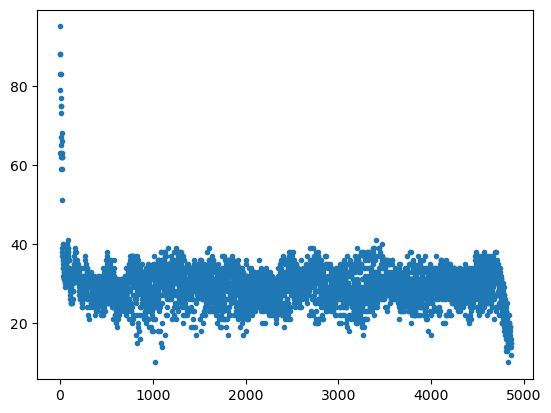

In [29]:
plt.plot(S, '.')

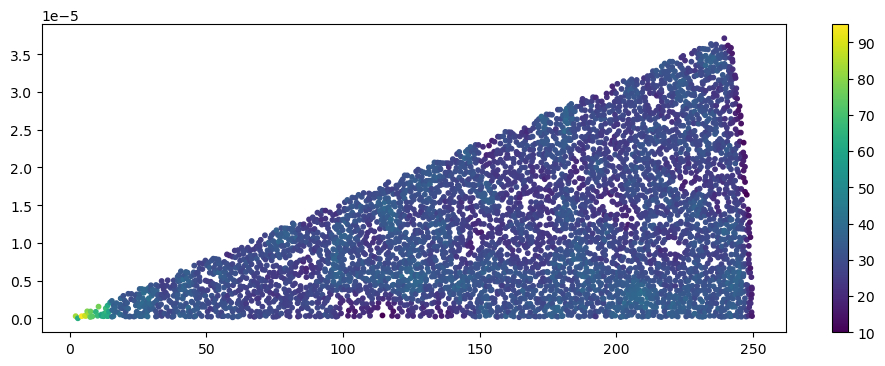

In [30]:
fig, ax = plt.subplots(1, figsize = (12,4))
plt.scatter(PP_[:,0]/p, PP_[:,1], c = S, s = 10)
plt.colorbar()
Smax = max(S)
Smin = min(S)
#plt.xlim([2.0e-5, 2.5e-5])

In [31]:
P_r = np.dot(PP_, r_matr)
P_l = np.dot(PP_, r_inv)

In [91]:
A = np.copy(AA)
s = np.copy(S)

In [92]:
v = np.var(s[s!=0])

In [93]:
A.shape[0]*symm*2

116664

In [94]:
remove_particles = 1000

def remove_particle(A_, s_):
    rem_idx = np.where(s_ == max(s_))[0][0]
    
    A_[rem_idx,:] = 0
    A_[:,rem_idx] = 0
    
    s = np.sum(A_, axis = 0)
    
    return A_, s

In [95]:
#remove_particles = 5000
V = []
for i in range(remove_particles):
    if i%100 == 0:
        print(i)
    A,s = remove_particle(A,s)
    V.append(np.var(s[s!=0]))
s1k = s

0
100
200
300
400
500
600
700
800
900


In [96]:
for i in range(3000):
    if i%100 == 0:
        print(i)
    A,s = remove_particle(A,s)
    V.append(np.var(s[s!=0]))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [97]:
idx_new = s1k != 0
PP_new = PP_[idx_new,:]
PP_removed = PP_[~idx_new,:]

In [98]:
PP_new.shape

(3861, 2)

In [99]:
s_new = s1k[idx_new]

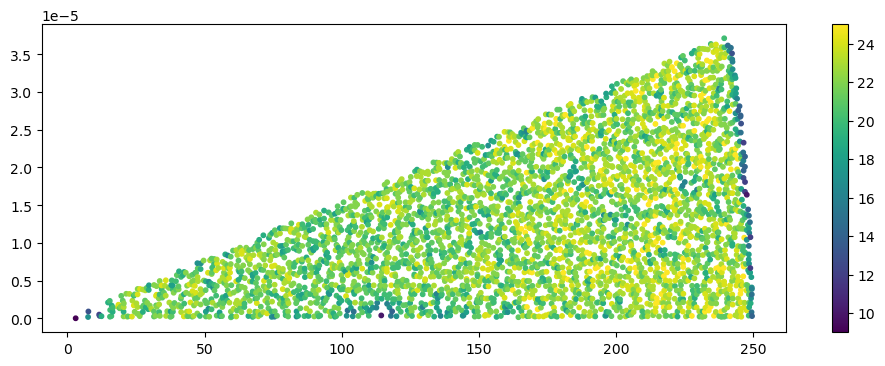

In [100]:
fig, ax = plt.subplots(1, figsize = (12,4))
plt.scatter(PP_new[:,0]/p, PP_new[:,1], c = s_new, s = 10)
plt.colorbar()

In [87]:
max(s_new) - min(s_new)

16.0

In [105]:
N0 = A.shape[0]*symm*2
sc = symm*2
lv = len(V)


In [88]:
bins = np.arange(1,70)

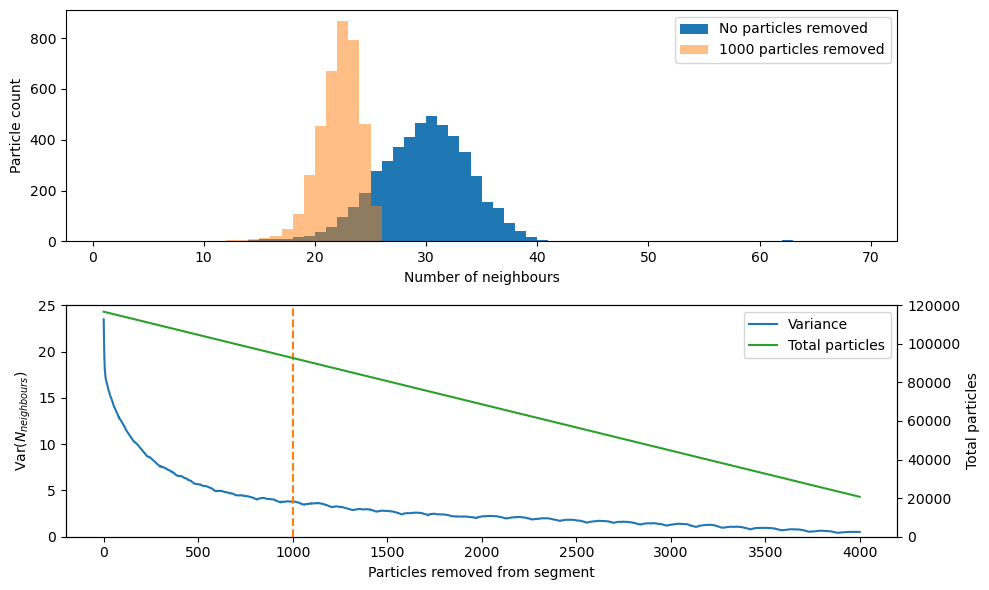

In [123]:
fig, ax = plt.subplots(2,figsize = (10,6))
#ax[0].scatter(PP_new[:,0]*1e6, PP_new[:,1]*1e6, c = s_new, s = 10)
#ax[0].set_xlabel("x [$\mu$m]")
#ax[0].set_ylabel("y [$\mu$m]")
ax[0].hist(S, bins = bins, label = "No particles removed");
ax[0].hist(s_new, bins = bins, alpha = 0.5, label = "1000 particles removed")
ax[0].set_xlabel("Number of neighbours")
ax[0].legend()
ax[0].set_ylabel("Particle count")
ax[1].plot(np.arange(len(V)),V, label = "Variance")
ax[1].set_ylabel("Var($N_{neighbours}$)")
ax[1].set_xlabel("Particles removed from segment")
ax[1].plot([1000,1000],[0,25],'--',c = 'tab:orange')
ax[1].set_ylim([0,25])
ax[1].plot(0,0,c = 'tab:green', label = "Total particles")
ax2 = ax[1].twinx()
ax2.plot(np.arange(len(V)), N0 - np.arange(len(V))*sc, c = 'tab:green', label = "Particles in lattice")
ax2.set_ylabel("Total particles")#, color = 'tab:green')
ax2.set_ylim([0,120000])
ax[1].legend()
plt.tight_layout()
plt.savefig("Paper/Equalization_neighbours_v2.png",bbox_inches = 'tight', dpi = 600)

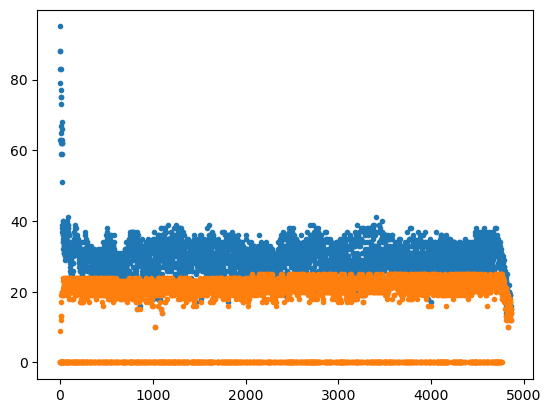

In [43]:
plt.plot(S, '.')
plt.plot(s,'.')

In [48]:
imin = len(df_small[df_small['r'] < rad*1.1].x)
imax = len(df_small[df_small['r'] < rr - 1.1*rad].x)
s_final = s[imin:imax][idx_new[imin:imax]]

In [52]:
np.std(S)

5.08708302348287

1.9391931517344225

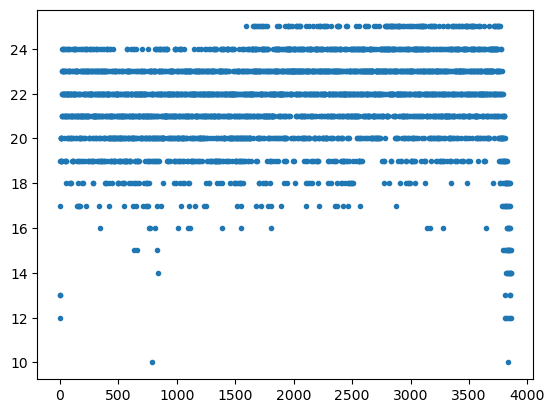

In [49]:
plt.plot(s_final,'.')
np.std(s_final)

In [46]:
s_final.shape[0]*2*symm

92640

In [149]:
th = 2*np.pi/symm
r_matr = np.array([[np.cos(th),np.sin(th)],[-np.sin(th),np.cos(th)]])

In [150]:
fnam

'gen_7/q3/B_points_lattices/B_d_70_n_12_no_pairs_full.csv'

In [151]:
f_new = fnam.replace("full","64kremoved")

In [152]:
f = open(fnam,"r")
lines = f.readlines()
header = ""
ii = 0
for l in lines:
    ii += 1
    header += l
    if "PARTICLE" in l:
        break

In [153]:
with open(f_new, 'w') as f:
    for l in header:
        f.write(l)
    for i in range(PP_new.shape[0]):
        p = PP_new[i]
        
        if np.linalg.norm(p) > 0:
        
            PP = [p]

            if (p[1] != 0) and np.dot(np.array([p[0],p[1],1]),l1) > 1e-10:
                p2 = np.copy(p)
                p2[1]*=-1
                PP.append(p2)

            for j in range(symm):
                for k, p_ in enumerate(PP):
                    f.write("{}, {}\n".format(p_[0],p_[1]))
                    PP[k] = np.dot(r_matr, p_)
        #f.write("{}".format(i))
        else:
            f.write("0, 0\n")

In [154]:
f_new

'gen_7/q3/B_points_lattices/B_d_70_n_12_no_pairs_64kremoved.csv'